# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)
(50000, 1)
Class 0: [33950  3438 22383 17932 42644 10297 42175 21064 40194 41238]
Class 1: [43164 19886 44474 41964 47264  3020 35454  1551 13301 20557]
Class 2: [13761 28705 30665 34620 20286 37333 30025   820 22726 46115]
Class 3: [28574  1834 48657 17835  6782 11079 12113 46443  4422  8863]
Class 4: [45623 13871 49727 30242  8447 12975 43857  5950 32315 45591]
Class 5: [26473 27903 35497 36629 42940 15575  3748 12485 44988 47544]
Class 6: [ 2697 45019 10253 22785 40850 28533  5302 36984 10173 48277]
Class 7: [46456 13193 41783 20884 49650 38113 37935 14976 47087  9956]
Class 8: [ 5378  6474 49968 28940   716 28128 35169 19416 48281  5304]
Class 9: [24436 20462 40724 22482 40080 10092 28899 12245 35829 47944]


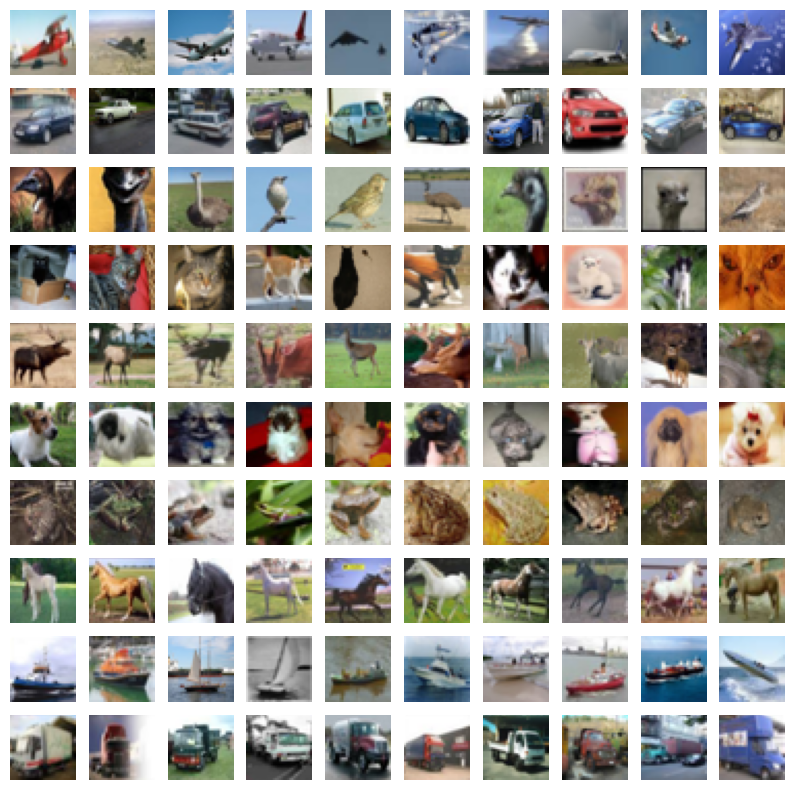

In [2]:
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

print(x_test.shape)
print(y_train.shape)

fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for class_id in range(10):
    indices = np.where(y_train == class_id)[0]
    random_indices = np.random.choice(indices, size=10, replace=False)
    print(f"Class {class_id}: {random_indices}")    
    for i in range(10):
        image_index = random_indices[i]
        ax = axes[class_id, i]
        ax.imshow(x_train[image_index], cmap='gray') 
        ax.axis('off')
plt.show()


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
from tensorflow import keras
from tensorflow.keras import layers
clear_session()

In [4]:
# Data parametrers
input_shape = (32, 32, 3)
num_classes = 10

# Normalization the the numbers
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Validate normalization
print("Minimum value:", x_train.min())
print("Maximum value:", x_train.max())
print('x_train shape:', x_train.shape)

# Convert CV to CM
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build model
model = keras.Sequential(
    [
# Input shape
        keras.Input(shape=input_shape),
# See with 32 filters (see patrons)        
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
# Downgrade the quality to extract max
        layers.MaxPooling2D(pool_size=(2, 2)),
# Convert 2D to 1D
        layers.Flatten(),
# Randomly drop
        layers.Dropout(0.2),
# 100 units before CL
        layers.Dense(100, activation='relu'),
# Output w/ softmax
        layers.Dense(num_classes, activation='softmax'),
        ])

model.summary()



Minimum value: 0.0
Maximum value: 1.0
x_train shape: (50000, 32, 32, 3)


2026-01-27 18:50:17.536627: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2026-01-27 18:50:17.536652: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2026-01-27 18:50:17.536657: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 14.04 GB
2026-01-27 18:50:17.536672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-27 18:50:17.536682: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
# Variables
batch_size = 512
epochs = 50

# Compile
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50


2026-01-27 18:50:17.898285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1388 - loss: 2.2771 - val_accuracy: 0.1977 - val_loss: 2.2178
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1900 - loss: 2.1889 - val_accuracy: 0.2284 - val_loss: 2.1391
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2289 - loss: 2.1093 - val_accuracy: 0.2704 - val_loss: 2.0527
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2598 - loss: 2.0447 - val_accuracy: 0.2999 - val_loss: 2.0013
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2798 - loss: 1.9982 - val_accuracy: 0.3067 - val_loss: 1.9629
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2979 - loss: 1.9635 - val_accuracy: 0.3139 - val_loss: 1.9396
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3084 - loss: 1.9405 - val_accuracy: 0.2956 - val_loss: 1.9696
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3221 - loss: 1.9125 - val_accuracy: 0.3280 - val_loss: 1.

*   Plot the cross entropy loss curve and the accuracy curve

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[2.2770581245422363, 2.1888949871063232, 2.109278917312622, 2.044748067855835, 1.9981579780578613, 1.963547706604004, 1.9405230283737183, 1.9124845266342163, 1.892970085144043, 1.8705512285232544, 1.8532447814941406, 1.8348019123077393, 1.8183602094650269, 1.802499771118164, 1.7874728441238403, 1.7687433958053589, 1.7529056072235107, 1.7371031045913696, 1.722692608833313, 1.7097575664520264, 1.6967105865478516, 1.678540825843811, 1.6682342290878296, 1.650635004043579, 1.64350426197052, 1.627164602279663, 1.61509370803833, 1.6022230386734009, 1.591797947883606, 1.5800102949142456, 1.5694807767868042, 1.5588762760162354, 1.5534507036209106, 1.5414735078811646, 1.5293375253677368, 1.5259945392608643, 1.5204099416732788, 1.5105708837509155, 1.4990055561065674, 1.4984413385391235, 1.4914277791976929, 1.4794286489486694, 1.478392481803894, 1.4781763553619385, 1.4688271284103394, 1.4643884897232056, 1.4635744094848633, 1.449569582939

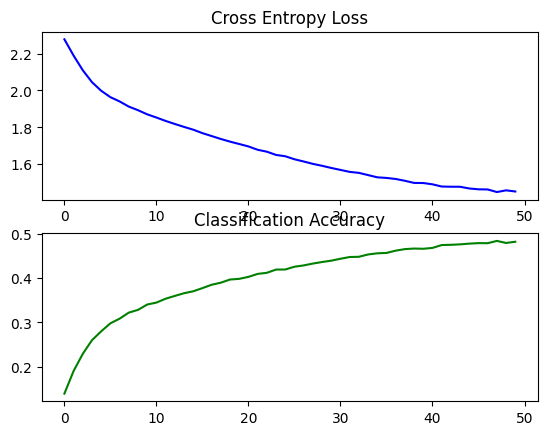

In [6]:
# Make the history
print(history.history.keys())
print(history.history['loss']) 
print(history.history['accuracy']) 

# See the history
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
batch_size = 512
epochs = 50

model = keras.Sequential([
    keras.Input(shape=input_shape),
    
    # Block 1:
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Block 2:
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # The Classifier Head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='relu') 
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
# Compile
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit
history2 = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1018 - loss: 3.9133 - val_accuracy: 0.0977 - val_loss: 3.5762
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1106 - loss: 2.6820 - val_accuracy: 0.1517 - val_loss: 2.2796
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1678 - loss: 2.2472 - val_accuracy: 0.1496 - val_loss: 2.2771
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1757 - loss: 2.2240 - val_accuracy: 0.1010 - val_loss: 2.2970
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1512 - loss: 2.2015 - val_accuracy: 0.1294 - val_loss: 2.1562
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2324 - loss: 2.1146 - val_accuracy: 0.1112 - val_loss: 2.4122
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1691 - loss: 2.1378 - val_accuracy: 0.2766 - val_loss: 2.0572
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2602 - loss: 2.0889 - val_accuracy: 0.1064 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

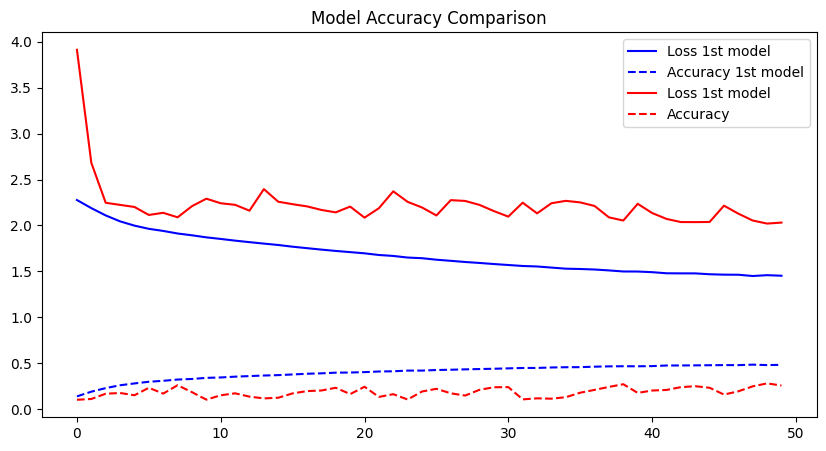

In [13]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(10, 5))

# Track 1: Simple Model
plt.plot(history.history['loss'], label='Loss 1st model', color='blue')
plt.plot(history.history['accuracy'], label='Accuracy 1st model', color='blue', linestyle='--')

# Track 2: VGG Model
plt.plot(history2.history['loss'], label='Loss 1st model', color='red')
plt.plot(history2.history['accuracy'], label='Accuracy', color='red', linestyle='--')

plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [24]:
predictions = model.predict(x_test)
predictions_x = np.argmax(predictions, axis=1)
predictions_y = np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions_y, predictions_x)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[389,  54,   0,  14, 104,  18,  12,   4, 258, 147],
       [ 74, 251,   1,  23, 133,  57,  60,   1, 242, 158],
       [125,  44,   2,  27, 544,  74,  54,   3,  72,  55],
       [ 46,  26,   2,  99, 433, 169,  76,   4,  67,  78],
       [ 46,  14,   0,  31, 694,  52,  66,   4,  42,  51],
       [ 33,  65,   0,  48, 447, 214,  52,   4,  95,  42],
       [ 22,  18,   0,  48, 621,  60, 195,   2,   5,  29],
       [ 34,  71,   0,  23, 523,  52,  22,  17,  55, 203],
       [129,  34,   0,  11,  57,  37,  17,   8, 533, 174],
       [ 42,  75,   1,  31, 130,  14,  35,   4, 209, 459]])

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions_y, predictions_x))

0.2853


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
